## 1. Import required libraries and read the dataset.

In [1]:
!pip install matplotlib
import warnings
warnings.filterwarnings("ignore")

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

In [4]:
df = pd.read_csv('loan_approval_data.csv')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [14]:
df.shape

(614, 12)

In [5]:
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
279,lp001908,female,yes,0.0,not graduate,no,4100,0.0,124.0,360.0,NaN,rural,y
574,lp002863,male,yes,3.0,graduate,no,6406,0.0,150.0,360.0,1.0,semiurban,n
565,lp002833,male,yes,0.0,not graduate,no,4467,0.0,120.0,360.0,NaN,rural,y
304,lp001978,male,no,0.0,graduate,no,4000,2500.0,140.0,360.0,1.0,rural,y
610,lp002979,male,yes,3.0,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y


In [6]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

df.info()

Number of Rows:  614
Number of Columns:  13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [8]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [11]:
df['gender'] = df['gender'].fillna('na')
df['married'] = df['married'].fillna('na')
df['dependents'] = df['dependents'].fillna(df['dependents'].median())
df['self_employed'] = df['self_employed'].fillna('na')
df['loanamount'] = df['loanamount'].fillna(df['loanamount'].median())
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].median())
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].median())

In [12]:
df = df.drop(['loan_id'], axis = 1)

## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [16]:
df['loan_status'].value_counts()

y    422
n    192
Name: loan_status, dtype: int64

In [17]:
df['loan_status'].value_counts(normalize=True)

y    0.687296
n    0.312704
Name: loan_status, dtype: float64

<Axes: >

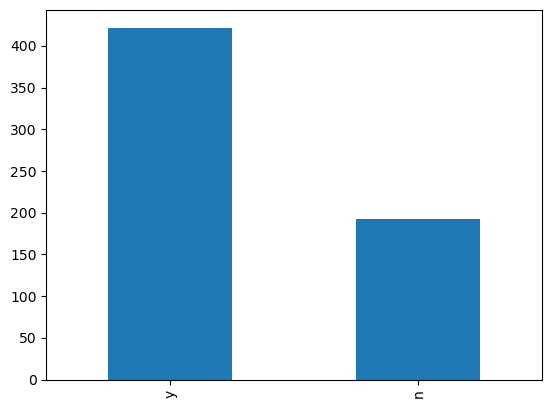

In [18]:
df['loan_status'].value_counts().plot.bar()

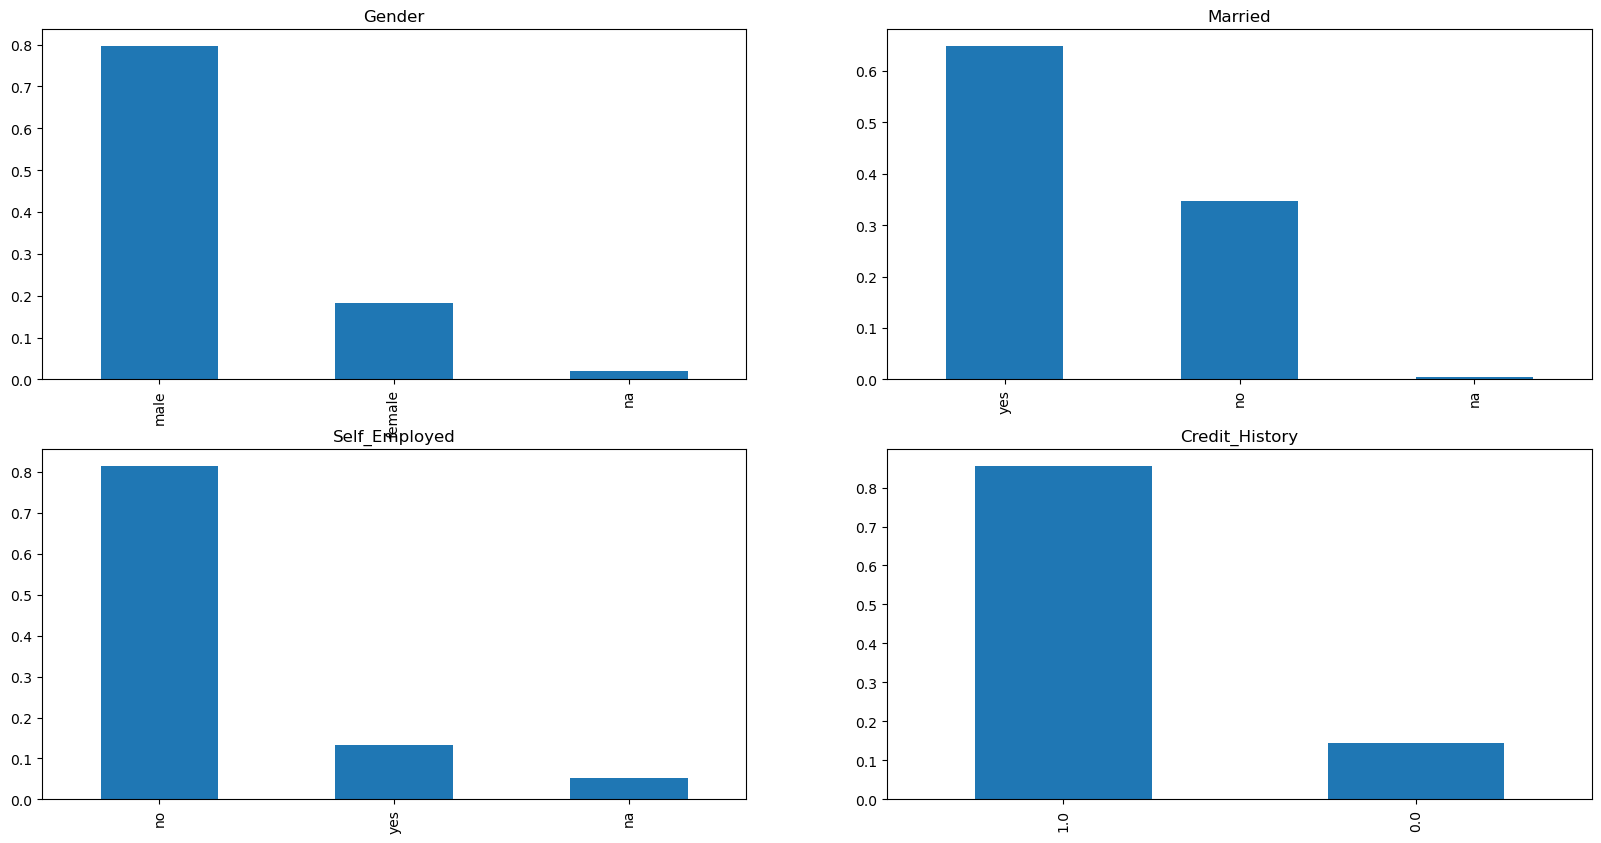

In [20]:
plt.figure(1) 
plt.subplot(221) 
df['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['self_employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['credit_history'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

### From the above data
### 80% of the data are male
### 60% are married
### 80% self employed
### 85% have repaid their debts

## 5. Encode the categorical data.

In [21]:
cat = ['gender', 'married','self_employed','credit_history']
lbl = LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(lbl.fit_transform)

## 6. Separate the target and independent features and split the data into train and test.

In [25]:
x_data = df['loan_status']
y_data = df[['gender','married','self_employed','credit_history','dependents','education','property_area','applicantincome','loan_amount_term','coapplicantincome','loanamount']]

In [23]:
x_data

0      y
1      n
2      y
3      y
4      y
      ..
609    y
610    y
611    y
612    y
613    n
Name: loan_status, Length: 614, dtype: object

In [26]:
y_data

,gender,married,self_employed,credit_history,dependents,education,property_area,applicantincome,loan_amount_term,coapplicantincome,loanamount
0,1,1,1,1,0.0,graduate,urban,5849,360.0,0.0,128.0
1,1,2,1,1,1.0,graduate,rural,4583,360.0,1508.0,128.0
2,1,2,2,1,0.0,graduate,urban,3000,360.0,0.0,66.0
3,1,2,1,1,0.0,not graduate,urban,2583,360.0,2358.0,120.0
4,1,1,1,1,0.0,graduate,urban,6000,360.0,0.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,1,1,0.0,graduate,rural,2900,360.0,0.0,71.0
610,1,2,1,1,3.0,graduate,rural,4106,180.0,0.0,40.0
611,1,2,1,1,1.0,graduate,urban,8072,360.0,240.0,253.0
612,1,2,1,1,2.0,graduate,urban,7583,360.0,0.0,187.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(y_data,x_data, test_size=0.3, random_state = 42)

print('shape of X_train:',X_train.shape)
print('shape of X_test:',X_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_test:',y_test.shape)

shape of X_train: (429, 11)
shape of X_test: (185, 11)
shape of y_train: (429,)
shape of y_test: (185,)


## 7. Build any classification model to predict the loan status of the customer and save your model using pickle.